<a href="https://colab.research.google.com/github/sitbayevalibek/data-science-praktikum-amaliyotlar/blob/main/simple_LR_amaliyot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/sitbayevalibek/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [4]:
housing = df[df.district=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [5]:
X = housing['size']
X

2       42.0
3       65.0
4       70.0
5       28.0
6       30.0
        ... 
7404    70.0
7422    20.0
7433    32.0
7445    70.0
7464    30.0
Name: size, Length: 1616, dtype: float64

In [6]:
y = housing['price']
y

2       37000.0
3       49500.0
4       55000.0
5       25500.0
6       21200.0
         ...   
7404    48000.0
7422    18500.0
7433    28000.0
7445    49800.0
7464    22914.0
Name: price, Length: 1616, dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

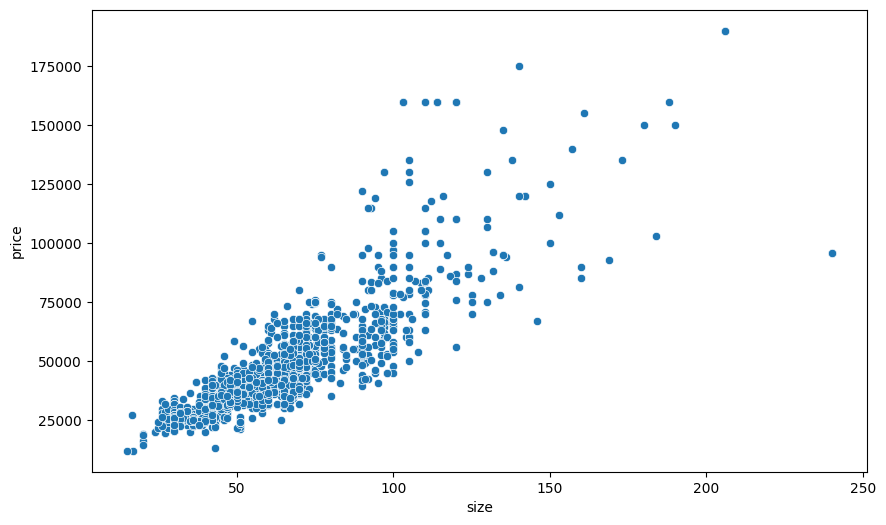

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

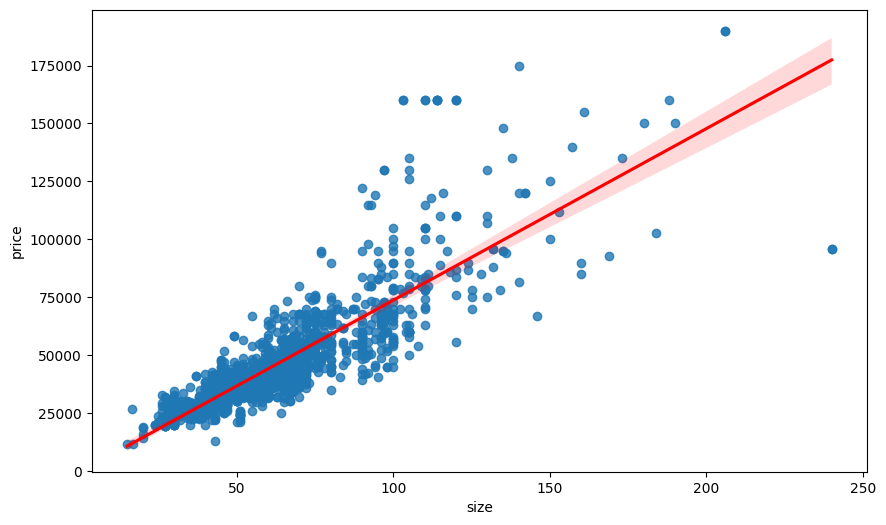

In [9]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

In [10]:
X.head()

2    42.0
3    65.0
4    70.0
5    28.0
6    30.0
Name: size, dtype: float64

In [11]:
y.head()

2    37000.0
3    49500.0
4    55000.0
5    25500.0
6    21200.0
Name: price, dtype: float64

In [12]:
x_mean = X.mean()
x_mean

61.90783415841584

In [13]:
y_mean = y.mean()
y_mean

45617.487623762376

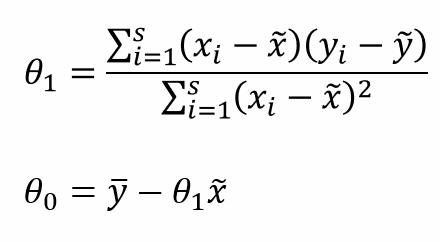

In [14]:
tepa = ((42-x_mean)*(37000-y_mean)).sum()
past = ((42-x_mean)**2).sum()

In [15]:
tilda1 = tepa/past
tilda1

432.8691687498019

In [18]:
tilda0 = y_mean-(tilda1*x_mean)
tilda0

18819.494912508322

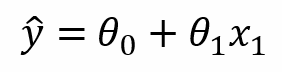

In [23]:
Y = tilda0+(tilda1*X.sample())
Y

5064    32671.308313
Name: size, dtype: float64

In [24]:
y.loc[5064]

24000.0

In [26]:
# test_data = housing.sample(5)
# test_data

# test_label = housing_labels.loc[test_data.index]
# test_label

In [27]:
x_test = X.sample(10)

In [28]:
y_test = y.loc[x_test.index]

In [30]:
Y_predicted = tilda0+(tilda1*x_test)
Y_predicted

183     37000.000000
798     46955.990881
528     40895.822519
4767    40462.953350
6772    31805.569975
5155    58643.458437
6844    40030.084181
6322    38298.607506
5230    66435.103475
4378    62106.411787
Name: size, dtype: float64

In [31]:
pd.DataFrame({'Prognoz':Y_predicted, 'Real baxosi': y_test})

,Prognoz,Real baxosi
183,37000.000000,25500.0
798,46955.990881,38500.0
528,40895.822519,26200.0
4767,40462.953350,33500.0
6772,31805.569975,25200.0
5155,58643.458437,56000.0
6844,40030.084181,37000.0
6322,38298.607506,45000.0
5230,66435.103475,83500.0
4378,62106.411787,56000.0


In [33]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, Y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

9494.283320369384


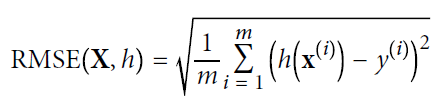
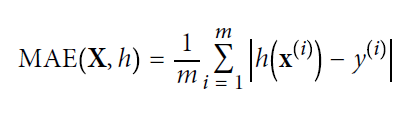

In [34]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_test, Y_predicted)
print(lin_mae)

8376.658014998575
